In [79]:
!pip install scikit-learn seaborn os

ERROR: Could not find a version that satisfies the requirement os (from versions: none)

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for os


In [166]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [167]:
# Load the local CSV dataset
file_path = '../Datasets/spotifyDataset.csv'
df = pd.read_csv(file_path)

# Preview the dataset to understand its structure
df.head()


,id,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [168]:
# Display the column names to check the available columns
df.columns

Index(['id', 'track_id', 'artists', 'album_name', 'track_name', 'popularity',
       'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_genre'],
      dtype='object')

In [169]:
# Check for missing values in the dataset
df.isnull().sum()

id                  0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [170]:
# Fill missing values with mean (or median if preferred)
df['energy'] = df['energy'].fillna(df['energy'].mean())
df['valence'] = df['valence'].fillna(df['valence'].mean())

In [171]:
# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Scale the 'energy' and 'valence' columns
df[['energy', 'valence']] = scaler.fit_transform(df[['energy', 'valence']])

# Verify the scaling
df[['energy', 'valence']].head()

,energy,valence
0,0.4610,0.718593
1,0.1660,0.268342
2,0.3590,0.120603
3,0.0596,0.143719
4,0.4430,0.167839


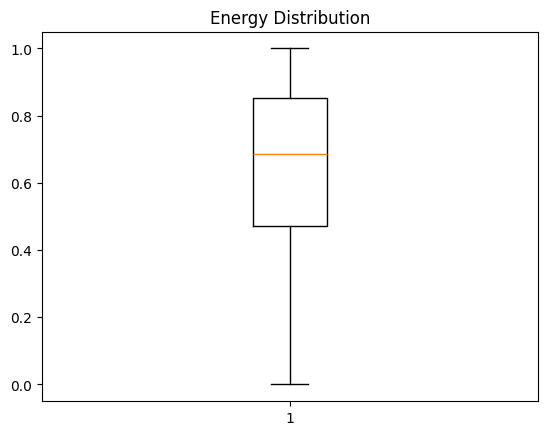

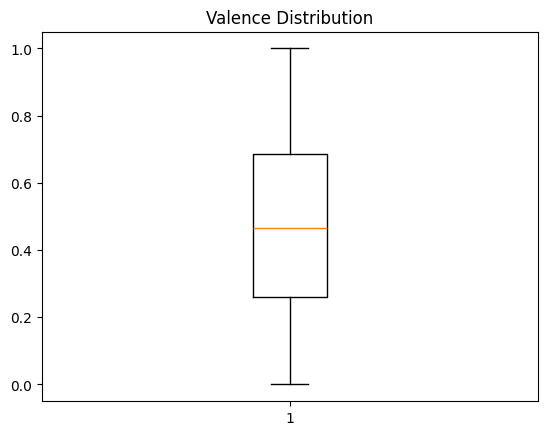

In [172]:
# Check for outliers using a simple boxplot (or any other technique)
import matplotlib.pyplot as plt

plt.boxplot(df['energy'])
plt.title('Energy Distribution')
plt.show()

plt.boxplot(df['valence'])
plt.title('Valence Distribution')
plt.show()

In [173]:
# Categorizing Songs into 12 Emotions based on Thayer’s 2D Emotion Model
def categorize_emotion(row):
    energy = row['energy']
    valence = row['valence']

    # High Energy & High Valence (Pleasant + Excited)
    if energy > 0.8 and valence > 0.7:
        return 'Elation'  # Overjoyed, Ecstatic
    elif energy > 0.6 and valence > 0.6:
        return 'Excitement'  # Happy, Enthusiastic

    # Moderate Energy & High Valence
    elif energy > 0.4 and valence > 0.6:
        return 'Happiness'  # Joyful, Cheerful

    # Low Energy & High Valence (Pleasant + Calm)
    elif energy < 0.4 and valence > 0.7:
        return 'Serenity'  # Peaceful, Tranquil
    elif energy < 0.4 and valence > 0.5:
        return 'Relaxation'  # Calm, Content

    # High Energy & Low Valence (Unpleasant + Excited)
    elif energy > 0.8 and valence < 0.3:
        return 'Distress'  # Panic, Overwhelmed
    elif energy > 0.6 and valence < 0.3:
        return 'Anxiety'  # Nervous, Fearful

    # Moderate Energy & Low Valence
    elif energy > 0.4 and valence < 0.4:
        return 'Anger'  # Frustration, Irritation

    # Low Energy & Low Valence (Unpleasant + Calm)
    elif energy < 0.3 and valence < 0.2:
        return 'Depression'  # Exhausted, Hopeless
    elif energy < 0.4 and valence < 0.3:
        return 'Sadness'  # Gloomy, Downhearted

    # Neutral Cases
    elif energy > 0.5 and valence > 0.4 and valence < 0.6:
        return 'Surprise'  # Neutral Shock
    else:
        return 'Indifference'  # Apathy, Boredom

# Apply the emotion categorization function
df['emotion'] = df.apply(categorize_emotion, axis=1)

# Check the distribution of emotions in the dataset
df['emotion'].value_counts()




emotion
Surprise        20240
Excitement      18206
Anger           18098
Elation         10744
Distress         9656
Indifference     8047
Happiness        7128
Depression       5980
Anxiety          5957
Sadness          5322
Relaxation       3033
Serenity         1589
Name: count, dtype: int64

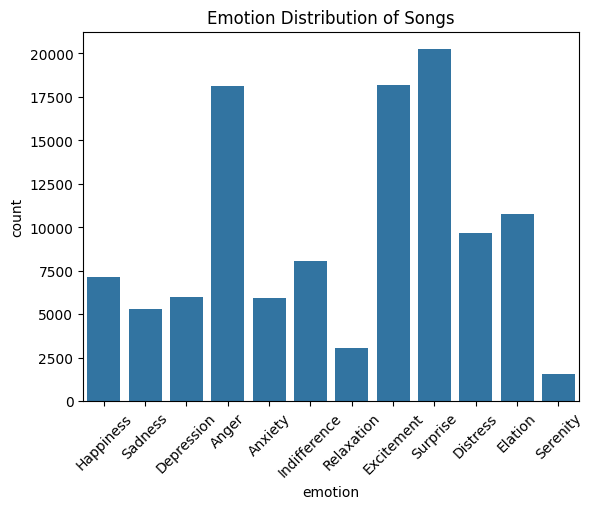

In [174]:
# Visualizing the emotion distribution
import seaborn as sns

sns.countplot(x='emotion', data=df)
plt.title('Emotion Distribution of Songs')
plt.xticks(rotation=45)
plt.show()

In [175]:
df

,id,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,emotion
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,0,0.1430,0.0322,0.000001,0.3580,0.718593,87.917,4,acoustic,Happiness
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,1,0.0763,0.9240,0.000006,0.1010,0.268342,77.489,4,acoustic,Sadness
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,1,0.0557,0.2100,0.000000,0.1170,0.120603,76.332,4,acoustic,Sadness
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,1,0.0363,0.9050,0.000071,0.1320,0.143719,181.740,3,acoustic,Depression
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,1,0.0526,0.4690,0.000000,0.0829,0.167839,119.949,4,acoustic,Anger
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,1,0.0422,0.6400,0.928000,0.0863,0.034070,125.995,5,world-music,Depression
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,0,0.0401,0.9940,0.976000,0.1050,0.035176,85.239,4,world-music,Depression
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,0,0.0420,0.8670,0.000000,0.0839,0.746734,132.378,4,world-music,Serenity
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,1,0.0297,0.3810,0.000000,0.2700,0.415075,135.960,4,world-music,Surprise


In [176]:
import os

# Create the directory if it doesn't exist
output_dir = '../Datasets'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Save the updated dataset to a new CSV file
output_file_path = os.path.join(output_dir, 'spotifyDataset_with_emotions.csv')
df.to_csv(output_file_path, index=False)

# Confirm the file has been saved
print(f"Updated dataset saved to {output_file_path}")



Updated dataset saved to ../Datasets\spotifyDataset_with_emotions.csv
